<a href="https://colab.research.google.com/github/lchoudhu-tibco/machine-learning-pub/blob/main/M3_NB_MiniProject_3_Video_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Video based Action Classification using LSTM

## Learning Objectives

At the end of the experiment, you will be able to :

* extract frames out of a video
* build the CNN model to extract features from the video frames
* train LSTM/GRU model to perform action classification

## Information

**Background:** The CNN LSTM architecture involves using Convolutional Neural Network (CNN) layers for feature extraction on input data combined with LSTMs to support sequence prediction.

CNN LSTMs were developed for visual time series prediction problems and the application of generating textual descriptions from sequences of images (e.g. videos). Specifically, the problems of:



*   Activity Recognition: Generating a textual description of an activity demonstrated in a sequence of images
*   Image Description: Generating a textual description of a single image.
*   Video Description: Generating a textual description of a sequence of images.

**Applications:** Applications such as surveillance, video retrieval and
human-computer interaction require methods for recognizing human actions in various scenarios. In the area of robotics, the tasks of
autonomous navigation or social interaction could also take advantage of the knowledge extracted
from live video recordings. Typical scenarios
include scenes with cluttered, moving backgrounds, nonstationary camera, scale variations, individual variations in
appearance and cloth of people, changes in light and view
point and so forth. All of these conditions introduce challenging problems that can be addressed using deep learning (computer vision) models.

## Dataset



**Dataset:** This dataset consists of labelled videos of 6 human actions (walking, jogging, running, boxing, hand waving and hand clapping) performed several times by 25 subjects in four different scenarios: outdoors s1, outdoors with scale variation s2, outdoors with different clothes s3 and indoors s4 as illustrated below.

![img](https://cdn.iisc.talentsprint.com/CDS/Images/actions.gif)

All sequences were taken over homogeneous backgrounds with a static camera with 25fps frame rate. The sequences were downsampled to the spatial resolution of 160x120 pixels and have a length of four seconds in average. In summary, there are 25x6x4=600 video files for each combination of 25 subjects, 6 actions and 4 scenarios. For this mini-project we have randomly selected 20% of the data as test set.

Dataset source: https://www.csc.kth.se/cvap/actions/

**Methodology:**

When performing image classification, we input an image to our CNN; Obtain the predictions from the CNN;
Choose the label with the largest corresponding probability


Since a video is just a series of image frames, in a video classification, we Loop over all frames in the video file;
For each frame, pass the frame through the CNN; Classify each frame individually and independently of each other; Choose the label with the largest corresponding probability;
Label the frame and write the output frame to disk

Refer this [Video Classification using Keras](https://medium.com/video-classification-using-keras-and-tensorflow/action-recognition-and-video-classification-using-keras-and-tensorflow-56badcbe5f77) for complete understanding and implementation example of video classification.

## Problem Statement

Train a CNN-LSTM based deep neural net to recognize the action being performed in a video

## Grading = 10 Points

### Install and re-start the runtime

In [ ]:
!pip3 install imageio==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303884 sha256=b6052f2baae82fe20be49a31a39dcde4bb393d14e700a96fea8d17f068478dfe
  Stored in directory: /root/.cache/pip/wheels/1b/28/50/248b15750b57c6b163d89d265f242e9cf6bce0bedfea3120aa
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.37.0
    Uninstalling imageio-2.37.0:
      Successfully uninstalled imageio-2.37.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.
scikit-image 0.25.2 requires imageio!=2.35.0,>=2.33, but you have imageio 2.4.1 which is incompatible.


In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Actions.zip
!unzip -qq Actions.zip
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


### Import required packages

In [ ]:
import keras
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, LSTM, TimeDistributed, Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D, GRU, Dense, Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D
from keras.layers import GRU, Dense, Dropout
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam

import os, glob
import cv2
import numpy as np

### Load the data and generate frames of video (2 points)

Detecting an action is possible by analyzing a series of images (that we name “frames”) that are taken in time.

Hint: Refer data preparation section in [keras_video_classification](https://keras.io/examples/vision/video_classification/)


In [ ]:
data_dir = "/content/Actions/train/"
test_data_dir = "/content/Actions/test/"

In [ ]:
import os
import cv2
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    while True:
        success, frame = video_reader.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, (224, 224))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list

for action in os.listdir(data_dir):
  action_path = os.path.join(data_dir, action)
  for video in os.listdir(action_path):
    video_path = os.path.join(action_path, video)
    frames = frames_extraction(video_path)
    print(f"Processed video: {video_path}")


Processed video: /content/Actions/train/running/person11_running_d2_uncomp.avi
Processed video: /content/Actions/train/running/person05_running_d3_uncomp.avi
Processed video: /content/Actions/train/running/person09_running_d3_uncomp.avi
Processed video: /content/Actions/train/running/person20_running_d1_uncomp.avi
Processed video: /content/Actions/train/running/person09_running_d1_uncomp.avi
Processed video: /content/Actions/train/running/person17_running_d2_uncomp.avi
Processed video: /content/Actions/train/running/person11_running_d1_uncomp.avi
Processed video: /content/Actions/train/running/person02_running_d4_uncomp.avi
Processed video: /content/Actions/train/running/person06_running_d2_uncomp.avi
Processed video: /content/Actions/train/running/person22_running_d1_uncomp.avi
Processed video: /content/Actions/train/running/person21_running_d4_uncomp.avi
Processed video: /content/Actions/train/running/person13_running_d4_uncomp.avi
Processed video: /content/Actions/train/running/pers

#### Visualize the frames and analyze the object in each frame. (1 point)

* Plot the frames of each class per row (6 rows)
* Plot the title as label on each subplot

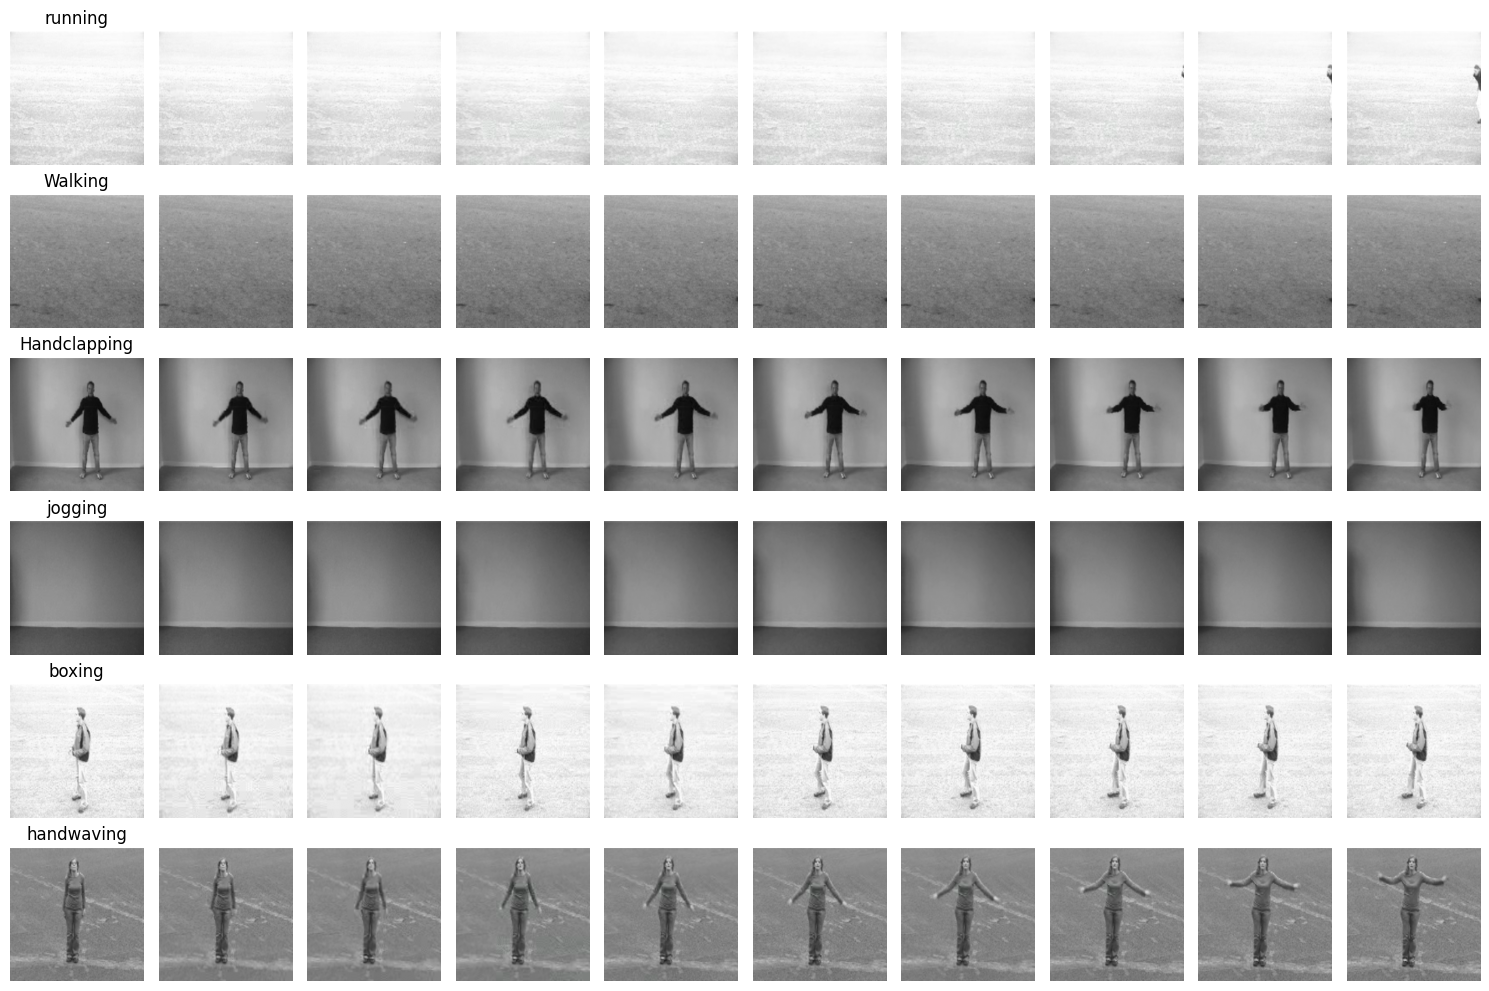

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

frames_data = {}

num_classes = 6
num_frames = 10

for class_idx, action in enumerate(os.listdir(data_dir)):
    if class_idx >= num_classes:
        break
    action_path = os.path.join(data_dir, action)

    # Pick first video from each class
    video_name = os.listdir(action_path)[0]
    video_path = os.path.join(action_path, video_name)

    frames = frames_extraction(video_path)
    frames_data[action] = frames[:num_frames]

# Plot frames for each class
fig, axes = plt.subplots(num_classes, num_frames, figsize=(15, 10))

for row, (label, frames) in enumerate(frames_data.items()):
    for col in range(num_frames):
        ax = axes[row, col]
        ax.imshow(frames[col])
        ax.axis("off")
        if col == 0:
            ax.set_title(label, fontsize=12)

plt.tight_layout()
plt.show()

### Create the Neural Network (4 points)

We can build the model in several ways. We can use a well-known model that we inject in time distributed layer, or we can build our own.

With custom ConvNet each input image of the sequence must pass to a convolutional network. The goal is to train that model for each frame and then decide the class to infer.

* Use ConvNet and Time distributed to detect features.
* Inject the Time distributed output to GRU or LSTM to treat as a time series.
* Apply a DenseNet to take the decision and classify.

##### Build the ConvNet for the feature extraction, GRU LSTM layers as a time series and Dense layers for classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GRU, LSTM, TimeDistributed
from tensorflow.keras.models import Sequential

# Define input shape (Sequence of frames, Height, Width, Channels)
SEQ_LENGTH = 30  # Number of frames per video
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Image size
CHANNELS = 3  # RGB images
NUM_CLASSES = 6  # Number of output classes

# Build CNN Feature Extractor
cnn_model = Sequential([
    TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'),
                    input_shape=(SEQ_LENGTH, IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    TimeDistributed(MaxPooling2D((2, 2))),

    TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')),
    TimeDistributed(MaxPooling2D((2, 2))),

    TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')),
    TimeDistributed(MaxPooling2D((2, 2))),

    TimeDistributed(Flatten()),  # Flatten feature maps for each frame
])

# Add LSTM or GRU for sequence modeling
model = Sequential([
    cnn_model,  # Use CNN as feature extractor

    # GRU or LSTM layer to process frames in time series
    GRU(128, return_sequences=False),  # Use LSTM(128, return_sequences=False) for LSTM variant

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 30, 100352)          │          93,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 128)                 │      38,585,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,686,982 (147.58 MB)

 Trainable params: 38,686,982 (147.58 MB)

 Non-trainable params: 0 (0.00 B)

#### Setup the parameters and train the model with epochs, batch wise

* Use train data to fit the model and test data for validation
* Configure batch size and epochs
* Plot the loss of train and test data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist  # Example dataset

# Load dataset (Replace with your dataset if different)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images: (num_samples, height, width, channels)
X_train = X_train.reshape((-1, 28, 28, 1)).astype("float32") / 255
X_test = X_test.reshape((-1, 28, 28, 1)).astype("float32") / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verify data shape
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Data Shape: (60000, 28, 28, 1), Labels Shape: (60000, 10)
Test Data Shape: (10000, 28, 28, 1), Labels Shape: (10000, 10)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9174 - loss: 0.2737 - val_accuracy: 0.9783 - val_loss: 0.0626
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9829 - val_loss: 0.0492
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9866 - val_loss: 0.0430
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9866 - val_loss: 0.0443
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9870 - val_loss: 0.0480
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9970 - loss: 0.0090 - val_accuracy: 0.9862 - val_loss: 0.0509
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9850 - val_loss: 0.0564
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9988 - loss: 0

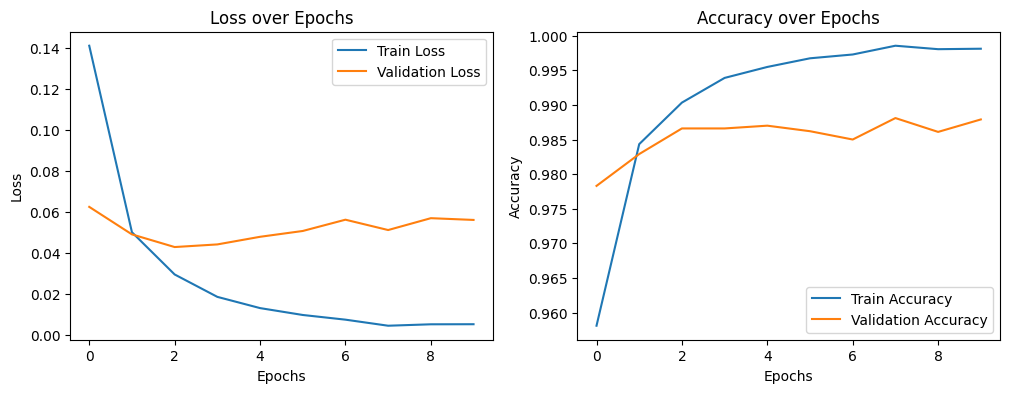

<Sequential name=sequential_2, built=True>

In [ ]:
# Note: There will be a high memory requirement for the training steps below.
# You should work on a GPU/TPU based runtime. See 'Change Runtime' in Colab
# Training time for each epoch could be ~30 mins
# To save and re-load your model later, see the reference below:
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb

import tensorflow as tf
import matplotlib.pyplot as plt

# Training Parameters
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 0.001

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and store the training history
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))  # Add validation data

# Plot Loss & Accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

plt.show()

# Save Model
model.save("video_classification_model.h5")

# Load Model (Optional)
model

### Use pre-trained model for feature extraction (3 points)

To create a deep learning network for video classification:

* Convert videos to sequences of feature vectors using a pretrained convolutional neural network, such as VGG16, to extract features from each frame.

* Train an LSTM network on the sequences to predict the video labels.

* Assemble a network that classifies videos directly by combining layers from both networks.

Hint: [VGG-16 CNN and LSTM](https://riptutorial.com/keras/example/29812/vgg-16-cnn-and-lstm-for-video-classification)

#### Load and fine-tune the pre-trained model

In [ ]:
from keras.applications.vgg16 import VGG16 # Import VGG16
from keras.layers import GlobalAveragePooling2D, Dense # Import Dense layer
from tensorflow.keras.optimizers import Adam


# Define input shape (Sequence of frames, Height, Width, Channels)
SEQ_LENGTH = 30  # Number of frames per video
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Image size
CHANNELS = 3  # RGB images
NUM_CLASSES = 6  # Number of output classes

# Load pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS))

# Freeze the layers of the base model (optional, but often helpful for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the base model and adding custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a dense layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Add the final classification layer

# Instead of using 'model', create a new Model instance:
fine_tuned_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the fine-tuned model
fine_tuned_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
fine_tuned_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Setup the parameters and train the model with epochs, batch wise

* Use train data to fit the model and test data for validation
* Configure batch size and epochs
* Plot the loss of train and test data

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9863 - val_loss: 0.0679
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9885 - val_loss: 0.0591
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9869 - val_loss: 0.0663
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9867 - val_loss: 0.0842
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9856 - val_loss: 0.0831
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9869 - val_loss: 0.0740
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9877 - val_loss: 0.0826
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9995 - loss: 0

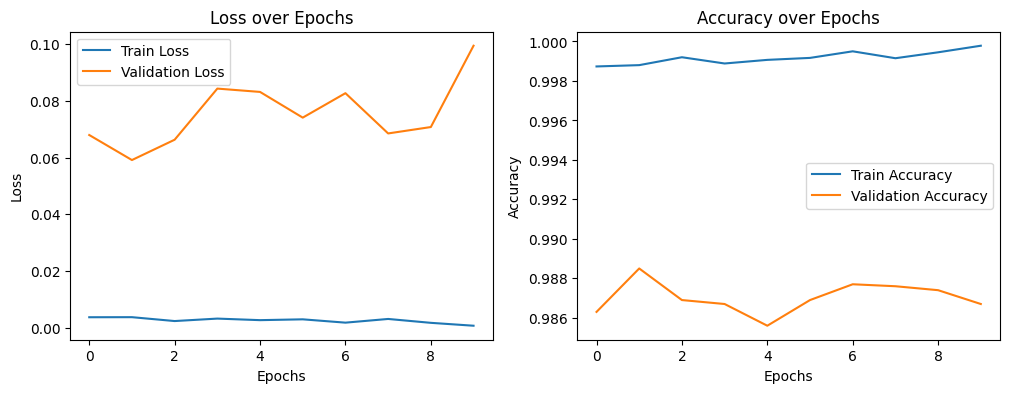

In [ ]:
# Training Parameters
BATCH_SIZE = 16
EPOCHS = 10

# Fit the model and store the training history
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))  # Add validation data

# Plot Loss & Accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

plt.show()


### Report Analysis

* Discuss on FPS, Number of frames and duration of each video
* Analyze the impact of the LSTM, GRU and TimeDistributed layers
* Discuss about the model convergence using pre-trained and ConvNet
* *Additional Reading*: Read and discuss about the use of Conv3D in video classification